# Histograms and Descriptive Statistics

- Main Idea: Histograms visualize descriptive statistics
- Processes: The formula for the sample mean, the process of drawing a histogram, the other Python code in this document
- Statistics: Mean, median, mode, and standard deviation
- Data: The Galton Height Data data set


## The Data
- We are going to learn today using a data set collected by Francis Galton in 1885.
- It was collected as part of a study of the relationship between adult childrens' height and the heights of their parents.

### Getting the Data
- First, we'll use Python to retrieve the data and take a quick look at what is in it.

In [2]:
# Due to JupyterLite's quirks, we have to take a bit of a detour.
import pandas as pd
from js import fetch
URL = "https://raw.githubusercontent.com/data-8/materials-fa17/master/lec/galton.csv" # The website where it lives.
res = await fetch(URL)
text = await res.text()
filename = 'data.csv'
with open(filename, 'w') as f:
    f.write(text)

# This makes galton_height_data represent the data we want.
galton_height_data = pd.read_csv(filename, sep=',')

# We can now simply call galton_height_data to see some of the data
galton_height_data

family  father  mother  midparentHeight  children  childNum  gender  \
0        1    78.5    67.0            75.43         4         1    male   
1        1    78.5    67.0            75.43         4         2  female   
2        1    78.5    67.0            75.43         4         3  female   
3        1    78.5    67.0            75.43         4         4  female   
4        2    75.5    66.5            73.66         4         1    male   
..     ...     ...     ...              ...       ...       ...     ...   
929    203    62.0    66.0            66.64         3         1    male   
930    203    62.0    66.0            66.64         3         2  female   
931    203    62.0    66.0            66.64         3         3  female   
932    204    62.5    63.0            65.27         2         1    male   
933    204    62.5    63.0            65.27         2         2  female   

     childHeight  
0           73.2  
1           69.2  
2           69.0  
3           69.0  
4           73.5  
..           ...  
929         64.0  
930         62.0  
931         61.0  
932         66.5  
933         57.0  

[934 rows x 8 columns]

### Conceptualizing the Data

Thankfully, we are not shown data for all 934 people. We are just given a few that gives us the gist of what the data contains:

- Each family is numbered.
- The number of children in the family of the given child is recorded.
- Each child's order in being born into their family is recorded.
- Each child's sex is recorded.
- The height of the mother and father is given as well as the midpoint of their heights.
- Of course, the height of each individual is given.

What else do you notice that I didn't list?

Stuff I noticed: ???

I wonder what the biggest family is. I could find out by finding the maximum among the values in the children column:

In [3]:
max(galton_height_data["children"])

15

15 is a lot, let's see what their data looks like

In [4]:
galton_height_data.loc[galton_height_data['children'] == 15]

family  father  mother  midparentHeight  children  childNum  gender  \
844    185    66.0    59.0            64.86        15         1    male   
845    185    66.0    59.0            64.86        15         2    male   
846    185    66.0    59.0            64.86        15         3    male   
847    185    66.0    59.0            64.86        15         4    male   
848    185    66.0    59.0            64.86        15         5    male   
849    185    66.0    59.0            64.86        15         6    male   
850    185    66.0    59.0            64.86        15         7    male   
851    185    66.0    59.0            64.86        15         8  female   
852    185    66.0    59.0            64.86        15         9  female   
853    185    66.0    59.0            64.86        15        10  female   
854    185    66.0    59.0            64.86        15        11  female   
855    185    66.0    59.0            64.86        15        12  female   
856    185    66.0    59.0            64.86        15        13  female   
857    185    66.0    59.0            64.86        15        14  female   
858    185    66.0    59.0            64.86        15        15  female   

     childHeight  
844         68.0  
845         67.0  
846         66.5  
847         66.0  
848         65.7  
849         65.5  
850         65.0  
851         65.0  
852         64.0  
853         63.0  
854         62.0  
855         61.0  
856         60.0  
857         58.0  
858         57.0

The parents are remarkably short compared to the rest. We'll see how remarkably short (and what that means) later.

### Narrowing our focus

- We are going to learn descriptive statistics using the rightmost column: height of the individual.
- We will also want to factor in the gender of the individual, so we will create 3 distinct data sets to play with:
    - All heights
    - Heights of the males
    - Heights of the females

In [5]:
# All heights
heights = galton_height_data['childHeight'].values

# The table with only the males
just_males = galton_height_data.loc[galton_height_data['gender'] == 'male']

# The heights of those males
mheights = just_males['childHeight'].values

# The table with only the females
just_females = galton_height_data.loc[galton_height_data['gender'] == 'female']

# Female heights
fheights = just_females['childHeight'].values

print(heights[:10])

[73.2 69.2 69.  69.  73.5 72.5 65.5 65.5 71.  68. ]


Now we don't have tables, we just have big lists of numbers.

In [99]:
print("Males: " + str(len(mheights)))

print("Females: " + str(len(fheights)))

print("Total: " + str(len(heights)))

Males: 481
Females: 453
Total: 934


Now we can see that there were 481 males and 453 females. As a sanity check, we can see that this accounts for all 934 of the individuals in the study.

In [41]:
481+453

934

## Histograms

- Histograms are a computationally quick and conceptually easy way to visualize data.
- Consider a simple set of values: 3, 3, 4, 4, 4, 4, 5, 5, 5
- A histogram is a bar graph showing the number of appearances of each value in numerical order left to right.
- You could draw the histogram of our simple data set as follows.

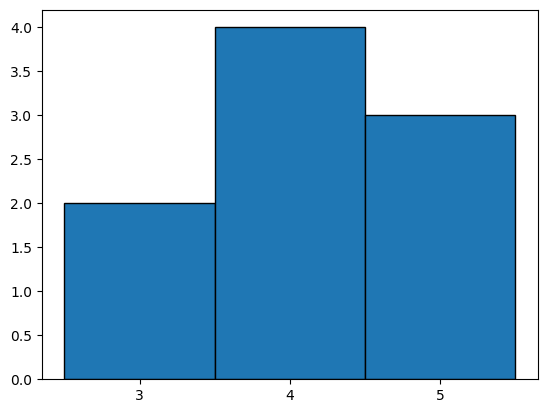

In [10]:
# The visualization tool we are going to use throughout
import matplotlib.pyplot as plt

# Very weird when you are counting numbers of numbers
plt.bar([3, 4, 5], [2, 4, 3], width = 1.0, edgecolor='black')
plt.xticks([3, 4, 5]);

Thanks to matplotlib and numpy, Python knows how to do this without having to hand-count the values.

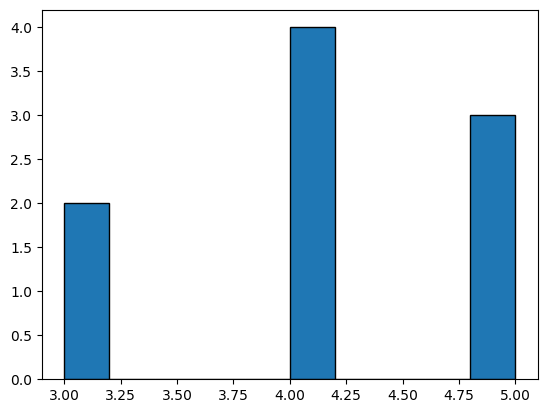

In [107]:
simple_data = [3, 3, 4, 4, 4, 4, 5, 5, 5]
plt.hist(simple_data, edgecolor='black');

- It counted the same way we did.
- This is going to come in handy with the heights data set; we don't want to count numbers of numbers when there are 934 of them.
- Python is going to prepare the histogram of our heights a little differently, though.

### Binning

Let's look at the histogram of the male height data.

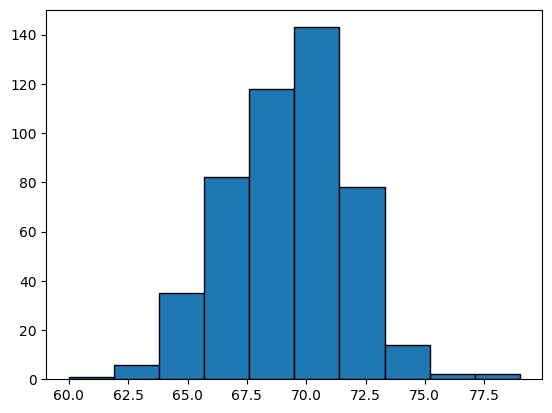

In [126]:
plt.hist(mheights, edgecolor="black");

This time, the histogram does not count the occurrence of every single number, it counts the number of values that live in a certain range. You can get these ranges by caluculating them by themselves, as follows.

In [121]:
counts, bins = np.histogram(mheights)
print(counts)
print(bins)

[  1   6  35  82 118 143  78  14   2   2]
[60.  61.9 63.8 65.7 67.6 69.5 71.4 73.3 75.2 77.1 79. ]


Note:

- The beginnings and endings correspond with the edges of the bars.
- The counts are reflected on the graph.

This practice is called **binning**, and it's helpful for large data sets. If we hadn't binned in this case there would have been as many bars as there are unique values. Let's count the unique values right now.

In [127]:
# A set is like an array, but repeats don't count.
# The function set converts an array to a set, getting rid of repeats.
# So if you measure the length of that, you get the number of unique values.
len(set(mheights))

48

If you set the number of bins to the number of unique values, you get what the histogram would look like if it counted each individual value.

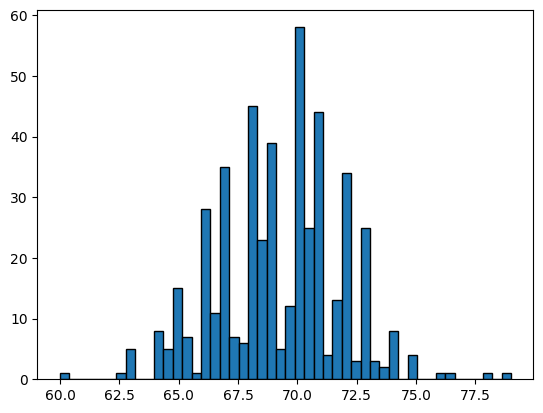

In [129]:
plt.hist(mheights, bins = 48, edgecolor = 'black');

- We see the same general shape, but with dips in between the integers.
- Binning smooths out the histogram so you can more easily see the trend that the data is following.
- Now we're going to learn how to describe trends more precisely.

## Descriptive Statistics

### What is a Statistic?

- A statistic is like a machine. It is a device that transforms a set of data, also known as a **sample**, into something else in a consistent way.
- A histogram is a statistic.
- That is just to mean that if two different people use the same statistic on the same sample, they will get the same result
    - The same way you sitting in your chair got the same result as me lecturing to you.
- (If you know college algebra, yes: a statistic is a function.)
- The definition of a statistic is very, very broad.
    - Technically, it's consistent to send every set of data to the number 1.
    - This would be a statistic, just not a helpful one.
    - The trick is figuring out which statistics are helpful and why.
    - Histograms are helpful because they can help you see descriptive statistics.
    - We'll talk about why each descriptive statistic is helpful as we go along.

### The Mean

You can calculate the **mean** of a sample by adding up all the numbers in the sample (taking its sum) and dividing by how many numbers there were.

Take our example of a simple sample from above:

$$[3, 3, 4, 4, 4, 4, 5, 5, 5]$$

The mean of this sample is

$$\frac{\mbox{sum of the numbers}}{\mbox{number of the numbers}} = \frac{3 + 3 + 4 + 4 + 4 + 4 + 5 + 5 + 5}{9} = \frac{37}{9}\approx 4.11$$

- The mean is the statistical term for the average.
- It is not necessarily the typical value. In the simple sample, none of its members are equal to its mean.
- But the simple sample's mean is something like a focal point---a center that the other data is distributed around.

Let's calculate the mean of all the heights and then look at the histogram of all the heights. Luckily we don't have to add them up by hand.

Average of all heights:  66.74593147751597


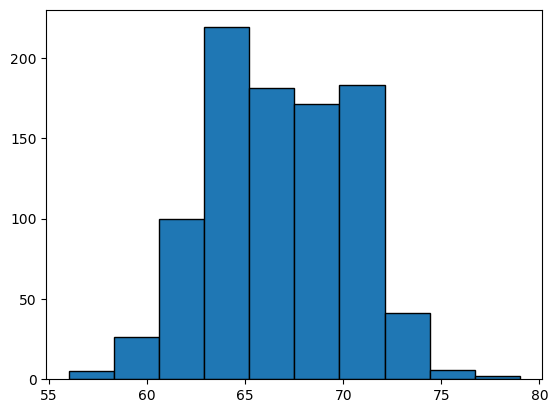

In [155]:
# sum adds up all the numbers in the array, and len counts how many there are.
# So you can get the mean by calculating sum(heights) / len(heights)
print("Average of all heights: ", str(sum(heights) / len(heights)))

plt.hist(heights, edgecolor = "black");

- You can see that the mean is just about the center of all the heights.
- There are more values to the left, so the mean is a little to the left.

The histogram of all the heights reflects something interesting about heights. Calculate the means of the heights of the males and the heights of the females.

In [154]:
print("Average male height: " + str(sum(mheights) / len(mheights)))
print("Average female height: " + str(sum(fheights) / len(fheights)))

Average male height: 69.2340956340957
Average female height: 64.10397350993381


- The female heights are on average slightly lower than the male heights.
- You can see this on the histogram.
- There are more values concentrated around 64 and 69 with a dip in the middle, reflecting that the male and female heights are combined into one data set.
- Although the effect is only very slight, it leads into our next concept: the mode of the sample.

### The Mode

- The definition of the mode is simple: It it the value that appears the most times in the sample.
- In $[3, 3, 4, 4, 4, 4, 5, 5, 5]$, the mode is $4$.

Let's look at the modes in all 3 of our data sets.

In [151]:
# Use the statistics library to find the mode in a large set of data.
import statistics as stat

print("Mode of every: " + str(stat.mode(heights)))
print("Mode of males: " + str(stat.mode(mheights)))
print("Mode of females: " + str(stat.mode(fheights)))

Mode of every: 65.0
Mode of males: 70.0
Mode of females: 65.0


- The modes of male and female heights separated better reflect the peaks found in the histogram of all the heights.
- When a histogram has multiple peaks it reflects a **bimodal** distribution of the data.
- A sample technically only has one mode, but thinking of this data as being bi-modal helps us see the duality of heights between the men and the women.

### The Median

- Usually, we would say "the mean, the median, and the mode." Mode only came up before median this time because height data including men and women perfectly shows the usefulness of modes.
- If the data were written out in numerical order from least to greatest, then the median would be the middle-most value.
- In $[3, 3, 4, 4, 4, 4, 5, 5, 5]$, the median is $4$.
- If there are an even number of values and the two middle-most are equal, then that number is the median. If they are not, then the median is the mid-point between those values.
- For example, the median of $[1, 1, 2, 2]$ is $1.5$.

Let's find the median of all 3 data sets.

In [157]:
print("Median of all: " + str(stat.median(heights)))
print("Median of males: " + str(stat.median(mheights)))
print("Median of females: " + str(stat.median(fheights)))

Median of all: 66.5
Median of males: 69.2
Median of females: 64.0


- The median detects the midpoint of the data.
- It is the observation where 50% of the values are less than and 50% of the values are greater than.
- It can help detect the skew of data by comparing it to the mean.
- For heights, the median is remarkably close to the mean. It doesn't offer much more information about the data.

#### A more useful example of a median

A more useful set of data to show the use of the median is household income data.
- Between 2012 and 2014 (according to the OECD), the average household salary in the US was \\$60154.
- On the other hand, the median income was \\$30960. (note: these values are adjusted by purchasing power, but the conclusions will be the same)
- So half of American households earned less than \\$30960, but if all income was shared, more than half of US households would see a raise.
- You can see the inequality in disparity of income between the average and the mean.

### Variation and the standard deviation

- The last descriptive statistic we will learn about is the sample standard deviation, which measures what is called **variation**.
- Variation is data's tendency to stay close to the mean or spread out further away from the mean. It is the data's level of dispersion.
- The higher the standard deviation, the more spread out everything is.
- First, let's see how the standard deviation is calculated on the simple data set:
    - Step 1: Subtract the mean from each value:
        $$[3 - 4.11, 3 - 4.11, 4 - 4.11, 4 - 4.11, 4 - 4.11, 4 - 4.11, 5 - 4.11, 5 - 4.11, 5 - 4.11]
        = [-1.11, -1.11, -0.11, -0.11, -0.11, -0.11, 0.89, 0.89, 0.89]$$
    - Step 2: Square every entry of the result:
        $$[-1.11^2, -1.11^2, -0.11^2, -0.11^2, -0.11^2, -0.11^2, 0.89^2, 0.89^2, 0.89^2]
        = [1.2321, 1.2321, 0.0121, 0.0121, 0.0121, 0.0121, 0.7921, 0.7921, 0.7921]$$
    - Step 3: Add up all the entries:
        $$[1.2321 + 1.2321 +  0.0121 + 0.0121 + 0.0121 + 0.0121 + 0.7921 + 0.7921 + 0.7921 = 4.8889$$
    - Step 4: Divide the value by the total number of values minus 1:
        $$\frac{4.8889}{9} \approx 0.6111$$
        This gives you what is called the **variance**.
    - Step 5: Take the square root of the result to get the **standard deviation**
        $$\sqrt{0.6111}\approx 0.7817$$
    - You could write this whole process as a formula, if it helps you. Assume that the sample is $x_1, x_2,...,x_n$, and let $\mu$ denote the mean. Then the variance is
        $$\sigma^2 = \frac{1}{n}((x_1 - \mu)^2 + (x_2 - \mu)^2 + ... + (x_n - \mu)^2) = \frac{1}{n}\sum_{i = 1}^n(x_i - \mu)^2$$
    - Typically, we calculate the variance and takes its square root to get the standard deviation $\sqrt{\sigma^2} = \sigma$
    - You might see some calculations where the sum of squares is divided by one less than the number of observations. The reason for this is the topic of a different discussion. Here, will only be concerned about variance calculated as above.

Naturally, Python can calculate the standard deviation very quickly.

In [7]:
import numpy as np

np.std([3, 3, 4, 4, 4, 4, 5, 5, 5])

0.7370277311900888

Let's use this to calculate the standard deviations of each of the data sets.

In [8]:
print("Standard deviation of all heights: " + str(np.std(heights)))
print("Standard deviation of male heights: " + str(np.std(mheights)))
print("Standard deviation of female heights: " + str(np.std(fheights)))

Standard deviation of all heights: 3.5773346010057634
Standard deviation of male heights: 2.6211758925072517
Standard deviation of female heights: 2.353051115760591


Now let's graph the histograms of all three data sets together.

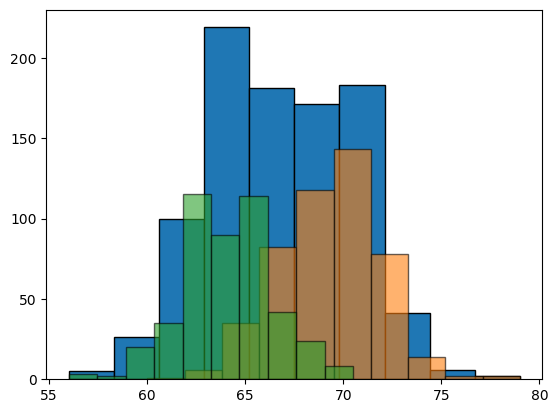

In [11]:
plt.hist(heights, edgecolor="black")
plt.hist(mheights, edgecolor="black", alpha=0.6)
plt.hist(fheights, edgecolor="black", alpha=0.6)
plt.show()

- It is clear from these histograms plotted together that the inclusion of male height data among female height data increases the dispersion of the heights. 
- This increase in dispersion is reflected in the higher standard deviation of the set of all heights compared to the standard deviation of each of the other two data sets.
- A standard deviation could be taken as a distance measuring the "deviance" of a certain value relative to the mean.
    - Given some random height, we can calculate its distance from the mean by taking the absolute value of the difference between it and the mean.
    - We can take that distance and divide it by the standard deviation to calculate the number of standard deviations it is away from the mean.

In [22]:
import math as m
import statistics as stat

observation = 682
print(heights[observation])
abs(stat.mean(heights) - heights[observation]) / np.std(heights)

67.0


0.07102173847883912

Interpret the meanings here: 

## Review

- A histogram is a way of showing the way a set of data is distributed.
- Aspects of the distribution of data can be measured using descriptive statistics.
- Looking at a histogram gives you hints about the descriptive statistics of a set of data.
- Comparing histograms on the same plot can show how descriptive statistics play out in a geometric way.